$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

# More Nonlinear Regression with Neural Networks

Now let's try modeling data with more than one input variable.  Let's try two!

Try making target data that is a hilly terrain.  Specify it with two-dimensional locations of the peaks and their heights.  (See [mplot3d documentation](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html] for help with 3d plotting.))  We can use our `normald` function to calculate the hills.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import neuralnetworks as nn

In [2]:
centers = np.array([[2,2], [5,4], [8,2], [9,8], [3,7]])
heights = np.array([5, 4, 5, 7, 4])

In [3]:
def normald(X, mu, sigma):
    """ normald:
       X contains samples, one per row, N x D. 
       mu is mean vector, D x 1.
       sigma is covariance matrix, D x D.  """
    D = X.shape[1]
    detSigma = sigma if D == 1 else np.linalg.det(sigma)
    if detSigma == 0:
        raise np.linalg.LinAlgError('normald(): Singular covariance matrix')
    sigmaI = 1.0/sigma if D == 1 else np.linalg.inv(sigma)
    normConstant = 1.0 / np.sqrt((2*np.pi)**D * detSigma)
    diffv = X - mu.T # change column vector mu to be row vector
    return normConstant * np.exp(-0.5 * np.sum(np.dot(diffv, sigmaI) * diffv, axis=1))[:,np.newaxis]

In [4]:
X = np.linspace(0,10, 20)
Y = np.linspace(0,10, 20)
X, Y = np.meshgrid(X, Y)
print(X.shape, Y.shape)
XY = np.hstack((X.reshape((-1,1)), Y.reshape((-1,1))))
print(XY.shape)
z = normald(XY,centers[0],np.eye(2))
z[:10]

(20, 20) (20, 20)
(400, 2)


array([[ 0.00291502],
       [ 0.00727181],
       [ 0.01375118],
       [ 0.01971216],
       [ 0.02142028],
       [ 0.01764464],
       [ 0.01101787],
       [ 0.0052153 ],
       [ 0.00187136],
       [ 0.00050902]])

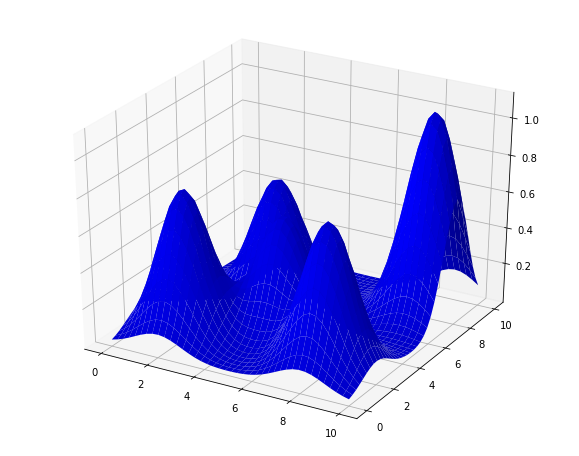

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

n = 40
X = np.linspace(0,10, n)
Y = np.linspace(0,10, n)
X, Y = np.meshgrid(X, Y)
XY = np.hstack((X.reshape((-1,1)), Y.reshape((-1,1))))
Z = np.zeros((XY.shape[0],1))
for hilli in range(len(heights)):
    Z += normald(XY, centers[hilli], np.eye(2)) * heights[hilli]
Z = Z.reshape(X.shape)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='blue', linewidth=0) #, cmap=cm.copper, antialiased=False)
# plt.colorbar(surf, shrink=0.5, aspect=5);


Or, how about some more realistic lighting? See these [examples of using LightSource](http://physicalmodelingwithpython.blogspot.com/2015/08/illuminating-surface-plots.html).

In [6]:
from matplotlib.colors import LightSource
LightSource?

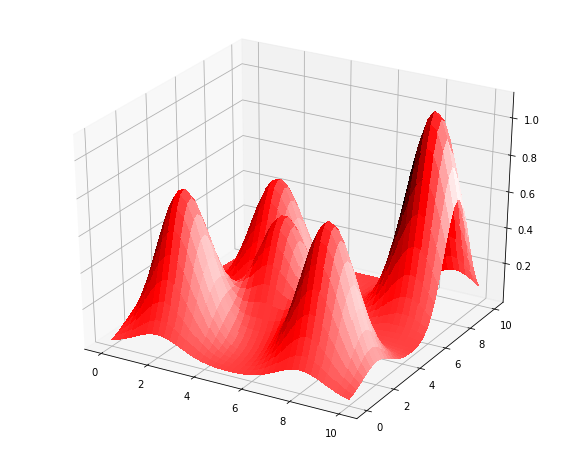

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

white = np.ones((Z.shape[0], Z.shape[1], 3))
red = white * np.array([1,0,0])
green = white * np.array([0,1,0])
blue = white * np.array([0,0,1])

ls = LightSource(azdeg=90, altdeg=80)
rgb = ls.shade_rgb(red,Z, vert_exag=0.5) #, blend_mode='soft')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

In [8]:
n = 20
Xnn = np.linspace(0, 10, n)
Ynn = np.linspace(0, 10, n)
Xnn, Ynn = np.meshgrid(Xnn, Ynn)
XYnn = np.hstack((Xnn.reshape((-1, 1)), Ynn.reshape((-1, 1))))
Znn = np.zeros((XYnn.shape[0], 1))
for hilli in range(len(heights)):
    Znn += normald(XYnn, centers[hilli], np.eye(2)) * heights[hilli]
Znn = Znn.reshape(Xnn.shape)

XYnn.shape, Znn.shape

((400, 2), (20, 20))

In [9]:
T = Znn.reshape((-1, 1))
T.shape

(400, 1)

Training took 1.79 seconds.


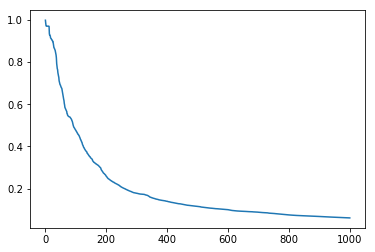

In [10]:
import time
startTime = time.time()
nnet = nn.NeuralNetwork(2, [10, 10], 1)
nnet.train(XYnn, T, nIterations=1000)
print('Training took {:.2f} seconds.'.format(time.time()-startTime))
plt.plot(nnet.getErrors());

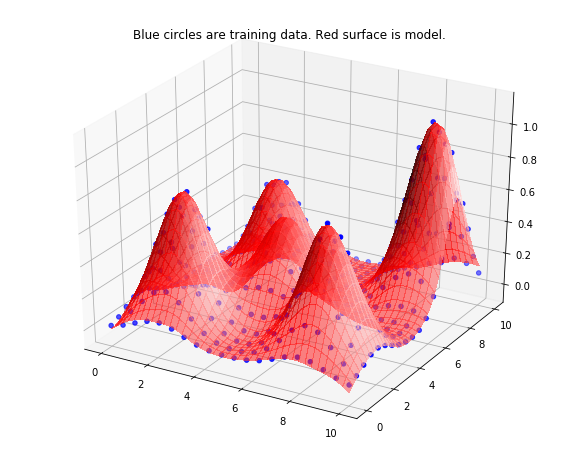

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ls = LightSource(azdeg=90, altdeg=80)
white = np.ones((Znn.shape[0], Znn.shape[1], 3))
red = white * np.array([1, 0, 0])
rgbTarget = ls.shade_rgb(red, Znn, vert_exag=0.5) #, blend_mode='soft')
ax.scatter(Xnn, Ynn, Znn, c='b', marker='o') #, alpha=0.5)

nPlot = 40
Xplot = np.linspace(0, 10, nPlot)
Yplot = np.linspace(0, 10, nPlot)
Xplot, Yplot = np.meshgrid(Xplot, Yplot)
XYplot = np.hstack((Xplot.reshape((-1, 1)), Yplot.reshape((-1, 1))))
predicted = nnet.use(XYplot)
P = predicted.reshape(Xplot.shape)
white = np.ones((P.shape[0], P.shape[1], 3))
red = white * np.array([1, 0, 0])

rgbPredicted = ls.shade_rgb(red, P, vert_exag=0.5)
ax.plot_surface(Xplot, Yplot, P, rstride=1, cstride=1, facecolors=rgbPredicted,
                linewidth=0, antialiased=False, shade=False, alpha=0.6 )

plt.title('Blue circles are training data. Red surface is model.');

In [12]:
def runNN(hiddens=[10]):
    ls = LightSource(azdeg=90, altdeg=80)
    white = np.ones((Znn.shape[0], Znn.shape[1], 3))
    red = white * np.array([1 ,0, 0])
    rgbTarget = ls.shade_rgb(red, Znn, vert_exag=0.5) #, blend_mode='soft')
    ax.scatter(Xnn, Ynn, Znn, c='b', marker='o', alpha=0.3)

    nnet = nn.NeuralNetwork(2, hiddens, 1)
    nnet.train(XYnn, T, nIterations=1000)
    predicted = nnet.use(XYplot)
    P = predicted.reshape(Xplot.shape)
    white = np.ones((P.shape[0], P.shape[1], 3))
    red = white * np.array([1, 0, 0])

    rgbPredicted = ls.shade_rgb(red, P, vert_exag=0.5)
    ax.plot_surface(Xplot, Yplot, P, rstride=1, cstride=1, facecolors=rgbPredicted,
                    linewidth=0, antialiased=False, shade=False, alpha=0.6 )
    return nnet

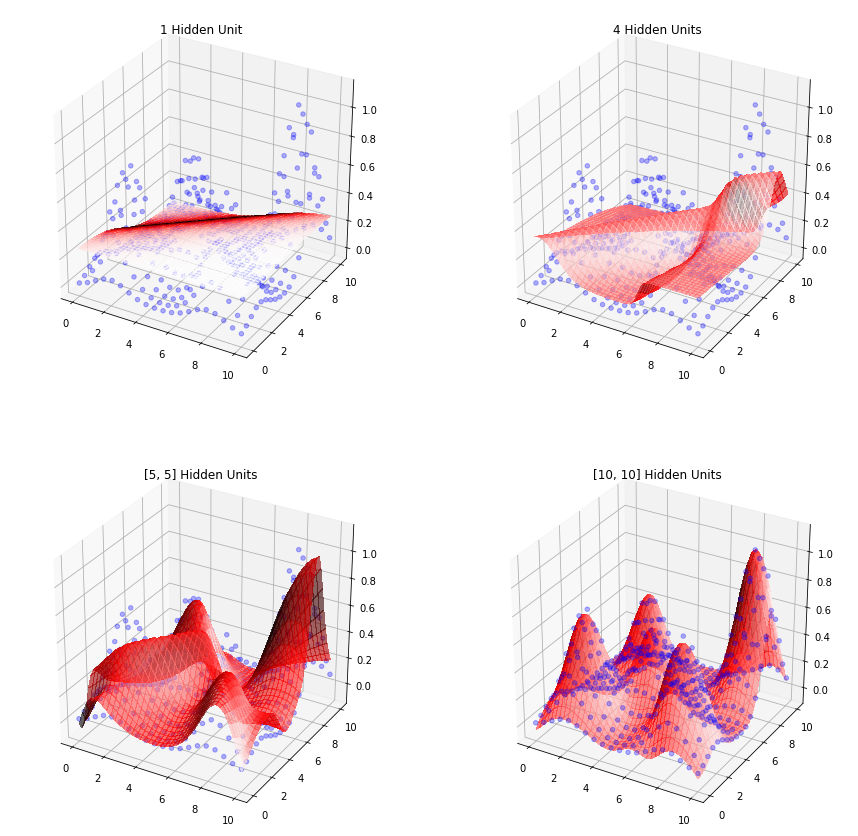

In [34]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(221, projection='3d')
runNN([1])
plt.title('1 Hidden Unit')

ax = fig.add_subplot(222, projection='3d')
runNN([4])
plt.title('4 Hidden Units')

ax = fig.add_subplot(223, projection='3d')
runNN([5, 5])
plt.title('[5, 5] Hidden Units')

ax = fig.add_subplot(224, projection='3d')
nnet = runNN([8,8])
plt.title('[10, 10] Hidden Units');

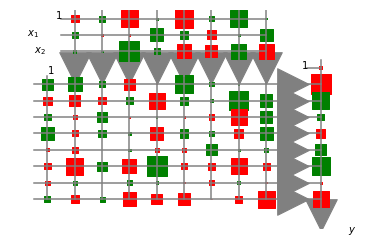

In [35]:
nnet.draw(['$x_1$', '$x_2$'], ['$y$'])

Make movie, with draw too.

NeuralNetwork(2, [10, 5], 1)
   Network was trained for 10001 iterations. Final error is 0.03926178501553146.


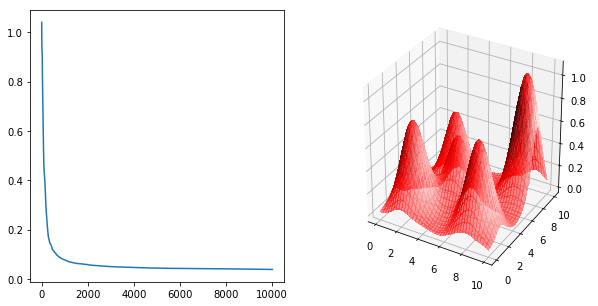

In [90]:
nnet = nn.NeuralNetwork(2, [10,5], 1)
nnet.train(XYnn, T, nIterations=10000, saveWeightsHistory=True)

fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(nnet.getErrors())
print(nnet)
    
predicted = nnet.use(XYplot)
P = predicted.reshape(Xplot.shape)
white = np.ones((P.shape[0], P.shape[1], 3))
red = white * np.array([1, 0, 0])

rgbPredicted = ls.shade_rgb(red, P, vert_exag=0.5)
ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(Xplot, Yplot, P, rstride=1, cstride=1, facecolors=rgbPredicted,
                    linewidth=0, antialiased=False, shade=False, alpha=0.6 )

Change following to work for this surface example!

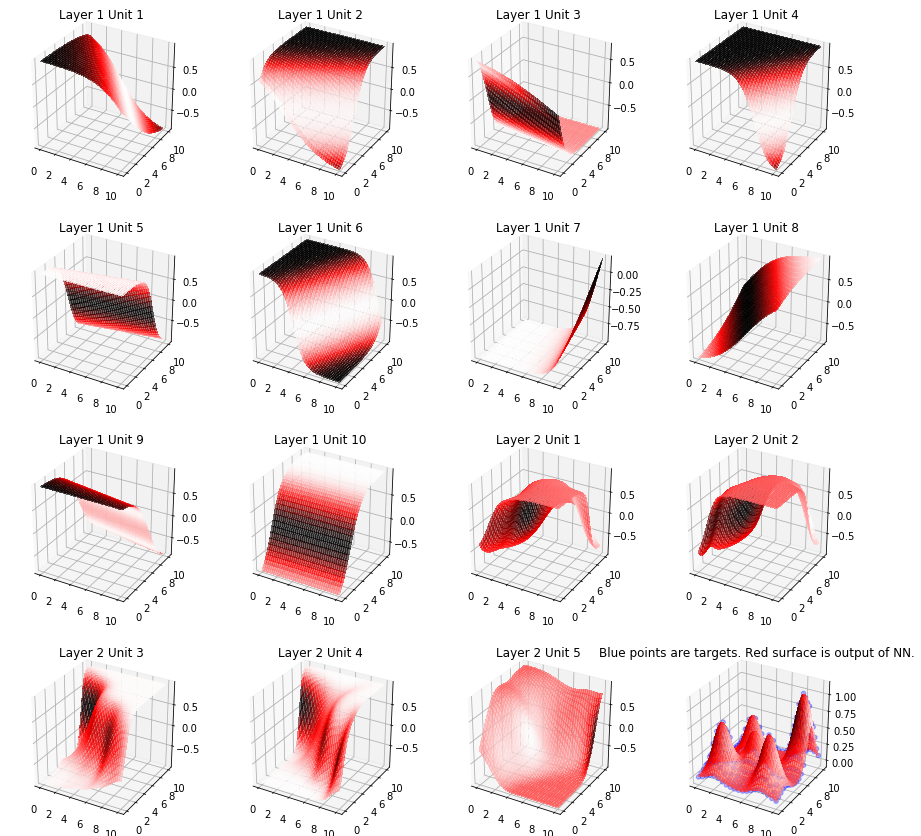

In [92]:
nPlot = 40
Xplot = np.linspace(0, 10, nPlot)
Yplot = np.linspace(0, 10, nPlot)
Xplot, Yplot = np.meshgrid(Xplot, Yplot)
XYplot = np.hstack((Xplot.reshape((-1, 1)), Yplot.reshape((-1, 1))))
white = np.ones((Xplot.shape[0], Xplot.shape[1], 3))
red = white * np.array([1, 0, 0])

weightsHistory = nnet.getWeightsHistory()
nnet.unpack(weightsHistory[-1,:])

predicted,Zs = nnet.use(XYplot, allOutputs=True)
# P = predicted.reshape(Xplot.shape)

nUnits = 0
for h in nnet.nhs:
    nUnits += h
nPlotsSqroot = int(np.sqrt(nUnits))
if nPlotsSqroot**2 <= nUnits:
    nPlotsSqroot += 1
    
ls = LightSource(azdeg=90, altdeg=80)
white = np.ones((Xplot.shape[0], Xplot.shape[1], 3))
red = white * np.array([1, 0, 0])

fig = plt.figure(figsize=(15, 15))
ploti = 0
surfaces = []
for layeri in range(len(nnet.nhs)):
    for uniti in range(nnet.nhs[layeri]):
        ploti += 1
        ax = fig.add_subplot(nPlotsSqroot, nPlotsSqroot, ploti, projection='3d')
        Zunit = Zs[layeri][:,uniti].reshape(Xplot.shape)
        rgbPredicted = ls.shade_rgb(red, Zunit, vert_exag=0.5)
        surfaces.append( ax.plot_surface(Xplot, Yplot, Zunit, rstride=1, cstride=1,
                                         facecolors=rgbPredicted,
                                         linewidth=0, antialiased=False, shade=False, alpha=0.6 ) )
        plt.title('Layer {:d} Unit {:d}'.format(layeri+1, uniti+1))
ploti += 1
ax = fig.add_subplot(nPlotsSqroot, nPlotsSqroot, ploti, projection='3d')
ax.cla()
targets = ax.scatter(Xnn, Ynn, Znn, c='b', marker='o', alpha=0.3)
P = predicted.reshape(Xplot.shape)
rgbPredicted = ls.shade_rgb(red, P, vert_exag=0.5)
nnSurface = ax.plot_surface(Xplot, Yplot, P, rstride=1, cstride=1, facecolors=rgbPredicted,
                    linewidth=0, antialiased=False, shade=False, alpha=0.6 )
plt.title('Blue points are targets. Red surface is output of NN.')  
#plt.tight_layout()
    
updatesPerFrame = 2